In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt

# 데이터 디렉토리 경로
data_dir = "/home/iai/Desktop/son/deeplearningproject/결과"

# 랜덤 시드 고정
random_seed = 42
tf.random.set_seed(random_seed)
np.random.seed(random_seed)

# 데이터 로드
batch_size = 32
img_height = 28
img_width = 28

dataset = image_dataset_from_directory(
    data_dir,
    image_size=(img_height, img_width),
    label_mode='categorical',
    batch_size=batch_size
)

# 클래스 비율 확인
class_names = dataset.class_names
print(f"Class names: {class_names}")

class_counts = np.zeros(len(class_names))
for _, labels in dataset:
    class_counts += np.sum(labels.numpy(), axis=0)

print(f"Class distribution: {class_counts}")


2024-05-23 23:12:35.530314: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


Found 8135 files belonging to 2 classes.


2024-05-23 23:12:36.209550: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-05-23 23:12:36.239166: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-05-23 23:12:36.239248: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3090 computeCapability: 8.6
coreClock: 1.695GHz coreCount: 82 deviceMemorySize: 23.69GiB deviceMemoryBandwidth: 871.81GiB/s
2024-05-23 23:12:36.239257: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-05-23 23:12:36.240593: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-05-23 23:12:36.240613: I tensorflow/stream_executor/pl

Class names: ['언어+뇌신경장애', '청각+뇌신경장애']
Class distribution: [1572. 6563.]


In [2]:
# 데이터셋을 numpy array로 변환
def dataset_to_numpy(dataset):
    images = []
    labels = []
    for img_batch, label_batch in dataset:
        images.append(img_batch.numpy())
        labels.append(label_batch.numpy())
    return np.concatenate(images), np.concatenate(labels)

images, labels = dataset_to_numpy(dataset)

# 데이터셋을 3:1:1 비율로 나누기
train_images, temp_images, train_labels, temp_labels = train_test_split(
    images, labels, test_size=0.4, stratify=labels, random_state=random_seed)

val_images, test_images, val_labels, test_labels = train_test_split(
    temp_images, temp_labels, test_size=0.5, stratify=temp_labels, random_state=random_seed)

# numpy array를 tf.data.Dataset으로 변환
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(batch_size)

# 각 데이터셋의 클래스 비율 확인
def get_class_distribution(labels):
    class_counts = np.sum(labels, axis=0)
    return class_counts

print(f"Train class distribution: {get_class_distribution(train_labels)}")
print(f"Validation class distribution: {get_class_distribution(val_labels)}")
print(f"Test class distribution: {get_class_distribution(test_labels)}")


Train class distribution: [ 943. 3938.]
Validation class distribution: [ 315. 1312.]
Test class distribution: [ 314. 1313.]


## Baseline 1

Epoch 1/100


2024-05-23 23:12:41.939754: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2024-05-23 23:12:42.230588: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8101
2024-05-23 23:12:42.604461: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11


 27/153 [====>.........................] - ETA: 0s - loss: 0.5086 - accuracy: 0.8102  

2024-05-23 23:12:42.831048: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublasLt.so.11
2024-05-23 23:12:42.859734: I tensorflow/stream_executor/cuda/cuda_blas.cc:1838] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


153/153 [==============================] - 2s 3ms/step - loss: 0.4407 - accuracy: 0.8271 - val_loss: 0.4506 - val_accuracy: 0.8236
Epoch 2/100
153/153 [==============================] - 0s 2ms/step - loss: 0.3542 - accuracy: 0.8595 - val_loss: 0.3691 - val_accuracy: 0.8611
Epoch 3/100
153/153 [==============================] - 0s 2ms/step - loss: 0.2987 - accuracy: 0.8804 - val_loss: 0.4076 - val_accuracy: 0.8218
Epoch 4/100
153/153 [==============================] - 0s 2ms/step - loss: 0.2479 - accuracy: 0.9035 - val_loss: 0.3196 - val_accuracy: 0.8685
Epoch 5/100
153/153 [==============================] - 0s 2ms/step - loss: 0.2156 - accuracy: 0.9121 - val_loss: 0.3619 - val_accuracy: 0.8500
Epoch 6/100
153/153 [==============================] - 0s 2ms/step - loss: 0.1911 - accuracy: 0.9236 - val_loss: 0.3580 - val_accuracy: 0.8783
Epoch 7/100
153/153 [==============================] - 0s 2ms/step - loss: 0.1683 - accuracy: 0.9340 - val_loss: 0.4113 - val_accuracy: 0.8672
Epoch 8/100

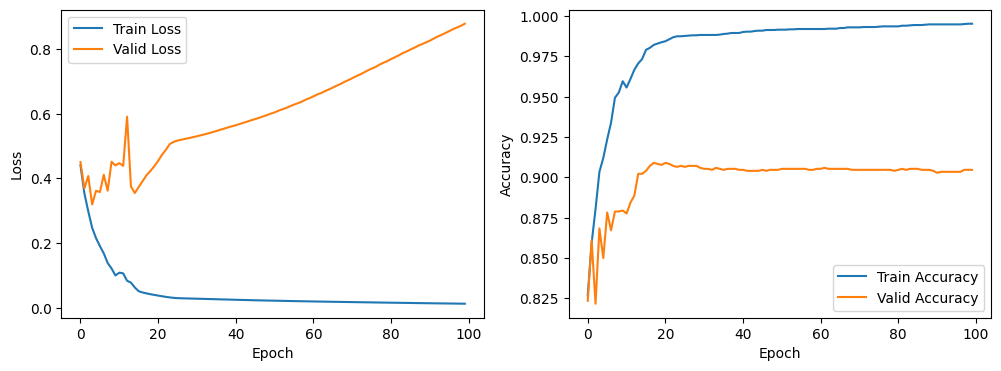

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
import os

checkpoint_dir = "/home/iai/Desktop/son/deeplearningproject/best_model"

# 체크포인트 경로 확인 및 생성
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)
    
# 모델 정의
model = models.Sequential([
    layers.InputLayer(input_shape=(28, 28, 3)),
    layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.AveragePooling2D((2, 2)),

    layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.AveragePooling2D((2, 2)),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.AveragePooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(2, activation='softmax')  # 클래스 수에 맞게 수정 필요
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 체크포인트 설정
checkpoint_path_baseline1 = os.path.join(checkpoint_dir, "best_model_baseline1.h5")
checkpoint_baseline1 = tf.keras.callbacks.ModelCheckpoint(checkpoint_path_baseline1, monitor='val_loss', save_best_only=True, mode='min')

# 학습률 감소 콜백 설정
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001)

# 모델 학습
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=100,
    callbacks=[checkpoint_baseline1, reduce_lr],
    verbose=1
)

model.load_weights(checkpoint_path_baseline1)

# 모델 평가
loss, accuracy = model.evaluate(test_dataset)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

# 테스트 데이터에 대한 예측 수행
y_true = np.concatenate([y for x, y in test_dataset], axis=0)
y_pred = model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_true, axis=1)

# 분류 보고서 생성
report = classification_report(y_true_classes, y_pred_classes, target_names=class_names, output_dict=True)
accuracy = report['accuracy']
recall = report['weighted avg']['recall']
precision = report['weighted avg']['precision']
f1_score = report['weighted avg']['f1-score']

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1-score: {f1_score}")

def calculate_ece(y_true, y_prob, n_bins=10):
    bins = np.linspace(0.0, 1.0, n_bins + 1)
    bin_indices = np.digitize(np.max(y_prob, axis=1), bins) - 1
    ece = 0.0
    for i in range(n_bins):
        bin_mask = bin_indices == i
        bin_size = np.sum(bin_mask)
        if bin_size > 0:
            bin_accuracy = np.mean(y_true[bin_mask] == np.argmax(y_prob[bin_mask], axis=1))
            bin_confidence = np.mean(np.max(y_prob[bin_mask], axis=1))
            ece += np.abs(bin_accuracy - bin_confidence) * bin_size / len(y_true)
    return ece

def calculate_oe(y_true, y_prob, n_bins=10):
    bins = np.linspace(0.0, 1.0, n_bins + 1)
    bin_indices = np.digitize(np.max(y_prob, axis=1), bins) - 1
    oe = 0.0
    for i in range(n_bins):
        bin_mask = bin_indices == i
        bin_size = np.sum(bin_mask)
        if bin_size > 0:
            bin_accuracy = np.mean(y_true[bin_mask] == np.argmax(y_prob[bin_mask], axis=1))
            bin_confidence = np.mean(np.max(y_prob[bin_mask], axis=1))
            if bin_confidence > bin_accuracy:
                oe += (bin_confidence - bin_accuracy) * bin_size / len(y_true)
    return oe

# ECE와 OE 계산
ece = calculate_ece(y_true_classes, y_pred)
oe = calculate_oe(y_true_classes, y_pred)

print(f"ECE: {ece}")
print(f"OE: {oe}")

# 학습 과정 시각화
# Loss 그래프
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Valid Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Baseline2

Epoch 1/100
153/153 [==============================] - 0s 1ms/step - loss: 0.6428 - accuracy: 0.7845 - val_loss: 0.4834 - val_accuracy: 0.8058
Epoch 2/100
153/153 [==============================] - 0s 1ms/step - loss: 0.4586 - accuracy: 0.8115 - val_loss: 0.4687 - val_accuracy: 0.8113
Epoch 3/100
153/153 [==============================] - 0s 1ms/step - loss: 0.4268 - accuracy: 0.8177 - val_loss: 0.4220 - val_accuracy: 0.8211
Epoch 4/100
153/153 [==============================] - 0s 1ms/step - loss: 0.4077 - accuracy: 0.8232 - val_loss: 0.4172 - val_accuracy: 0.8205
Epoch 5/100
153/153 [==============================] - 0s 1ms/step - loss: 0.3888 - accuracy: 0.8330 - val_loss: 0.4236 - val_accuracy: 0.8064
Epoch 6/100
153/153 [==============================] - 0s 1ms/step - loss: 0.3708 - accuracy: 0.8427 - val_loss: 0.4048 - val_accuracy: 0.8218
Epoch 7/100
153/153 [==============================] - 0s 1ms/step - loss: 0.3461 - accuracy: 0.8511 - val_loss: 0.4018 - val_accuracy: 0.8304

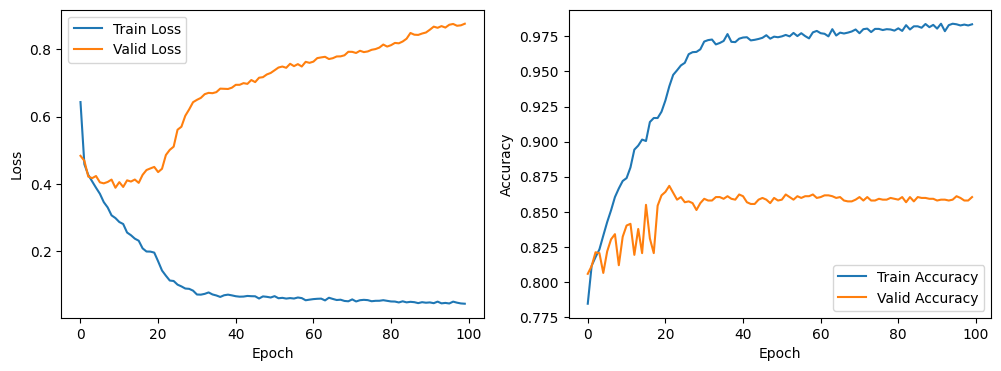

In [4]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

checkpoint_dir = "/home/iai/Desktop/son/deeplearningproject/best_model"
# Pretrained 모델 로드
ae_model = tf.keras.models.load_model('./pretrained_model/ae_model.h5')
mlp_model = tf.keras.models.load_model('./pretrained_model/Speech_classification.h5')

# 특징 벡터 추출
train_features = ae_model.predict(train_images)
val_features = ae_model.predict(val_images)
test_features = ae_model.predict(test_images)

# 레이블을 인코딩 (필요한 경우)
train_labels = np.argmax(train_labels, axis=1)
val_labels = np.argmax(val_labels, axis=1)
test_labels = np.argmax(test_labels, axis=1)

# 특징 벡터를 사용한 데이터셋 생성
train_dataset = tf.data.Dataset.from_tensor_slices((train_features, train_labels)).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((test_features, test_labels)).batch(batch_size)

# MLP 모델 정의 및 드롭아웃 추가
mlp_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(train_features.shape[1],)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

# 모델 컴파일
mlp_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# 체크포인트 설정
checkpoint_path_baseline2 = os.path.join(checkpoint_dir, "best_model_baseline2.h5")
checkpoint_baseline2 = tf.keras.callbacks.ModelCheckpoint(checkpoint_path_baseline2, monitor='val_loss', save_best_only=True, mode='min')

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, min_lr=0.00001)
# 모델 학습
history_mlp = mlp_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=100,
    callbacks=[checkpoint_baseline2,reduce_lr],
    verbose=1
)

mlp_model.load_weights(checkpoint_path_baseline2)

# 모델 평가
loss_mlp, accuracy_mlp = mlp_model.evaluate(test_dataset)
print(f"MLP Test loss: {loss_mlp}")
print(f"MLP Test accuracy: {accuracy_mlp}")

# 테스트 데이터에 대한 예측 수행
y_true = np.concatenate([y for x, y in test_dataset], axis=0)
y_pred = mlp_model.predict(test_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)

# 분류 보고서 생성
report_mlp = classification_report(y_true, y_pred_classes, target_names=class_names, output_dict=True)
accuracy_mlp = report_mlp['accuracy']
recall_mlp = report_mlp['weighted avg']['recall']
precision_mlp = report_mlp['weighted avg']['precision']
f1_score_mlp = report_mlp['weighted avg']['f1-score']

print(f"MLP Accuracy: {accuracy_mlp}")
print(f"MLP Recall: {recall_mlp}")
print(f"MLP Precision: {precision_mlp}")
print(f"MLP F1-score: {f1_score_mlp}")

def calculate_ece(y_true, y_prob, n_bins=10):
    bins = np.linspace(0.0, 1.0, n_bins + 1)
    bin_indices = np.digitize(np.max(y_prob, axis=1), bins) - 1
    ece = 0.0
    for i in range(n_bins):
        bin_mask = bin_indices == i
        bin_size = np.sum(bin_mask)
        if bin_size > 0:
            bin_accuracy = np.mean(y_true[bin_mask] == np.argmax(y_prob[bin_mask], axis=1))
            bin_confidence = np.mean(np.max(y_prob[bin_mask], axis=1))
            ece += np.abs(bin_accuracy - bin_confidence) * bin_size / len(y_true)
    return ece

def calculate_oe(y_true, y_prob, n_bins=10):
    bins = np.linspace(0.0, 1.0, n_bins + 1)
    bin_indices = np.digitize(np.max(y_prob, axis=1), bins) - 1
    oe = 0.0
    for i in range(n_bins):
        bin_mask = bin_indices == i
        bin_size = np.sum(bin_mask)
        if bin_size > 0:
            bin_accuracy = np.mean(y_true[bin_mask] == np.argmax(y_prob[bin_mask], axis=1))
            bin_confidence = np.mean(np.max(y_prob[bin_mask], axis=1))
            if bin_confidence > bin_accuracy:
                oe += (bin_confidence - bin_accuracy) * bin_size / len(y_true)
    return oe

# ECE와 OE 계산
ece = calculate_ece(y_true, y_pred)
oe = calculate_oe(y_true, y_pred)

print(f"ECE: {ece}")
print(f"OE: {oe}")

# 학습 과정 시각화
# Loss 그래프
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_mlp.history['loss'], label='Train Loss')
plt.plot(history_mlp.history['val_loss'], label='Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(history_mlp.history['accuracy'], label='Train Accuracy')
plt.plot(history_mlp.history['val_accuracy'], label='Valid Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()